In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



#np.random.seed(42)

# Estimation with MLE

In [2]:
# beta should be higher than c
n = 1000 # number of nodes - 585 similar to c elegans
d = 6  # number of neighbouts to take into account

#sigma = np.log(1/1e-3 - 1)    # intercept the higher the harder for creating edges 6
sigma = 8

n_iteration = 100000
warm_up     = 1400 # 10k

################################################
params_dict = {
    "n": n,
    "d": d,
    "sigma": sigma,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [3]:
graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 5, stability_window = 10)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

In [5]:
g = graphs[-1]

# Estimation with regression 

In [6]:
est = estimator.LogitRegEstimator(g , d=0)

In [7]:
features, labels = est.get_features_labels()

In [8]:
result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

print('real: ', -sigma)
print('est: ', params[0])

                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.045      
Date:               2024-07-09 14:13 AIC:              18388.5521 
No. Observations:   499500           BIC:              18421.9162 
Df Model:           2                Log-Likelihood:   -9191.3    
Df Residuals:       499497           LL-Null:          -9626.0    
Converged:          1.0000           LLR p-value:      1.5510e-189
No. Iterations:     33.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -7.9276     0.0819   -96.8256   0.0000   -8.0881   -7.7672
x1         0.3117     0.0144    21.6653   0.0000    0.2835    0.3399
x2         0.3197     0.0148    21.6277   0.0000    0.2907    0.3487

real:  -

In [10]:
summary = result.summary2()
summary.tables[1].loc['const']


Coef.       -7.927635
Std.Err.     0.081875
z          -96.825552
P>|z|        0.000000
[0.025      -8.088108
0.975]      -7.767162
Name: const, dtype: float64

# Plot the curve d X estimation 

In [11]:
d_range = range(10)
pathfolder = f'runs/d_multiple_sigma_{sigma}'

# Create the directory if it does not exist
if not os.path.exists(pathfolder):
    os.makedirs(pathfolder)

In [12]:
params_list = []
result_list = []

for d in d_range:
    # Simulation
    graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
    graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 5, stability_window = 10)
    g = graphs[-1]
    import gc
    del graphs
    gc.collect()

    # Estimation
    est = estimator.LogitRegEstimator(g, d=d)
    features, labels = est.get_features_labels()
    result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

    params_list.append(params)
    result_list.append(result)
    import pickle
    with open(f'{pathfolder}/results_array_{d}.pkl', 'wb') as f:
        pickle.dump(result_list, f)



iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.031      
Date:               2024-07-09 14:16 AIC:              18655.6889 
No. Observations:   499500           BIC:              18689.0530 
Df Model:           2                Log-Likelihood:   -9324.8    
Df Residuals:       499497           LL-Null:          -9626.0    
Converged:          1.0000           LLR p-value:      1.5800e-131
No. Iterations:     27.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.2619     0.0670   -108.3691   0.0000   -7.3932   -7.1305
x1        0.0184     0.0010     18.0242   0.0000    0.0164    0.0204
x2        0.0200     0.0011     18.9251   0.0000    0.0179    0.0221

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.036      
Date:               2024-07-09 14:16 AIC:              18582.7339 
No. Observations:   499500           BIC:              18616.0979 
Df Model:           2                Log-Likelihood:   -9288.4    
Df Residuals:       499497           LL-Null:          -9631.9    
Converged:          1.0000           LLR p-value:      6.3918e-150
No. Iterations:     19.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.4235     0.0713   -104.0513   0.0000   -7.5633   -7.2837
x1        0.0071     0.0004     18.0709   0.0000    0.0063    0.0079
x2        0.0082     0.0004     20.3216   0.0000    0.0074    0.0090

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.036      
Date:               2024-07-09 14:16 AIC:              18538.9998 
No. Observations:   499500           BIC:              18572.3638 
Df Model:           2                Log-Likelihood:   -9266.5    
Df Residuals:       499497           LL-Null:          -9608.4    
Converged:          1.0000           LLR p-value:      3.2725e-149
No. Iterations:     26.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.4612     0.0737   -101.2732   0.0000   -7.6056   -7.3168
x1        0.0030     0.0002     18.8536   0.0000    0.0026    0.0033
x2        0.0030     0.0002     18.8853   0.0000    0.0027    0.0033

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.034      
Date:               2024-07-09 14:17 AIC:              18604.3938 
No. Observations:   499500           BIC:              18637.7579 
Df Model:           2                Log-Likelihood:   -9299.2    
Df Residuals:       499497           LL-Null:          -9626.0    
Converged:          1.0000           LLR p-value:      1.1483e-142
No. Iterations:     26.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -7.7788     0.0894   -87.0195   0.0000   -7.9540   -7.6036
x1         0.0018     0.0001    18.0293   0.0000    0.0016    0.0020
x2         0.0018     0.0001    17.4722   0.0000    0.0016    0.0020

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.037      
Date:               2024-07-09 14:17 AIC:              18577.3105 
No. Observations:   499500           BIC:              18610.6746 
Df Model:           2                Log-Likelihood:   -9285.7    
Df Residuals:       499497           LL-Null:          -9637.8    
Converged:          1.0000           LLR p-value:      1.1946e-153
No. Iterations:     26.0000          Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -9.3007     0.1638   -56.7685   0.0000   -9.6219   -8.9796
x1         0.0020     0.0001    16.4794   0.0000    0.0018    0.0023
x2         0.0019     0.0001    15.7186   0.0000    0.0016    0.0021

iteratio

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.004     
Date:               2024-07-09 14:18 AIC:              19181.9645
No. Observations:   499500           BIC:              19215.3286
Df Model:           2                Log-Likelihood:   -9588.0   
Df Residuals:       499497           LL-Null:          -9626.0   
Converged:          1.0000           LLR p-value:      3.0057e-17
No. Iterations:     26.0000          Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -6.9841     0.1414   -49.3888   0.0000   -7.2613   -6.7070
x1        0.0006     0.0001     5.5371   0.0000    0.0004    0.0008
x2        0.0006     0.0001     6.0408   0.0000    0.0004    0.0009

iteration: 0
iteration:

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.003     
Date:               2024-07-09 14:20 AIC:              19180.2909
No. Observations:   499500           BIC:              19213.6550
Df Model:           2                Log-Likelihood:   -9587.1   
Df Residuals:       499497           LL-Null:          -9620.2   
Converged:          1.0000           LLR p-value:      4.6330e-15
No. Iterations:     22.0000          Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -5.2854     0.0743   -71.1413   0.0000   -5.4310   -5.1398
x1       -0.0005     0.0001    -5.6034   0.0000   -0.0006   -0.0003
x2       -0.0005     0.0001    -5.9543   0.0000   -0.0007   -0.0003

iteration: 0
iteration:

/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.011     
Date:               2024-07-09 14:21 AIC:              19073.5969
No. Observations:   499500           BIC:              19106.9610
Df Model:           2                Log-Likelihood:   -9533.8   
Df Residuals:       499497           LL-Null:          -9637.8   
Converged:          1.0000           LLR p-value:      6.9898e-46
No. Iterations:     31.0000          Scale:            1.0000    
-------------------------------------------------------------------
         Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const   -5.3465     0.0435   -123.0286   0.0000   -5.4317   -5.2614
x1      -0.0012     0.0001     -9.8000   0.0000   -0.0015   -0.0010
x2      -0.0011     0.0001     -8.8935   0.0000   -0.0013   -0.0009



# Analysis of result

In [17]:
x = np.array(params_list)
x[:, 0]

array([-7.93496175, -7.72379837, -7.26186888, -7.42349422, -7.46117993,
       -7.77884011, -9.30073894, -6.98413339, -5.28539432, -5.34654849])

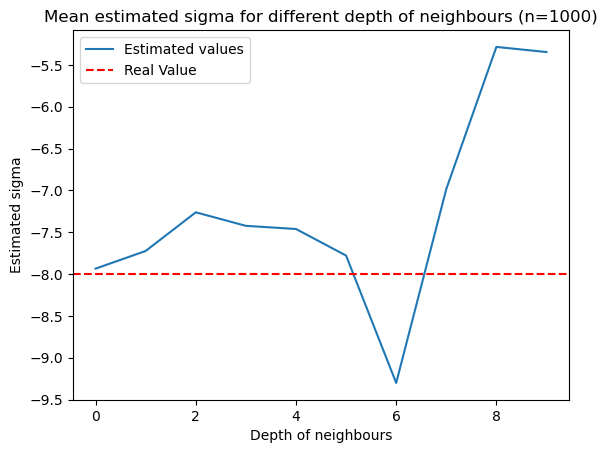

In [28]:
plt.figure()
plt.plot(d_range, x[:,0], label='Estimated values')

plt.axhline(y=-sigma, color='r', linestyle='--', label='Real Value')

plt.legend()
plt.xlabel('Depth of neighbours')
plt.ylabel('Estimated sigma')
plt.title(f'Mean estimated sigma for different depth of neighbours (n={n})')
plt.show()